### 학습 목표
- KAGGLE 경진대회에서 높은 순위를 차지하는 것!!
- 탑승객의 정보를 바탕으로 생존/사망자 예측
- 머신러닝 학습의 전체 과정에 대한 실습
    - 문제 정의
    - 데이터 수집 (KAGGLE 에서 다운로드 )
    - 탐색적 데이터 분석(EDA) - 데이터를 알아보는 것 (시각화)
    - 데이터 전처리
        - 오타 수정, 결측치/이상치 처리
        - encoding(인코딩)- 범주형->수치형
        - bining(그룹핑) - 수치형->범주형
        - 정규화/scanling - 값들을 일정 범위로 축소하는 과정(분산을 줄이는 과정)
        - 편향 제거
    
    - 모델 선택 및 학습
        - 모델 생성
        - 특성 선택
        - 하이퍼 파라미터 튜닝 (매개변수 조절)
        - 훈련데이터와 평가데이터로 분리 - 과소적합/과대적합 유무 확인
            - 과소적합: 둘 다 정확도가 낮으면 과소 적합
                - 특성이 너무 적어서, 데이터가 너무 적어서, 학습이 너무 적어서
            - 과대적합: 훈련과 테스트의 차이가 큰 것, 훈련데이터의 정확도가 더 높음
                - 특성이 너무 많아서, 데이터가 너무 적어서, 학습을 너무 많이 해서
    
    - 평가 : 생성된 모델을 validation 데이터(새로운 데이터)로 평가

### 문제 정의
- 머신러닝의 전체과정을 실습
- 타이타닉 데이터에 포함된 데이터의 의미를 분석
- 테스트 데이터로 생존/사망 예측

### 데이터 수집

In [89]:
import pandas as pd

test=pd.read_csv("./data/test.csv",index_col="PassengerId")
train=pd.read_csv("./data/train.csv",index_col="PassengerId")

### 탐색적 데이터 분석 - 데이터 확인

In [90]:
train.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [91]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


- 컬럼값들의 특징

<table border=0 align=left width=700>
  <tr><th>feature<th width=200>의미<th width=300>설명<th> 타입
  <tr><td>Survivied<td>생존여부<td>target 라벨 (0 : 사망, 1 : 생존)<td>integer
  <tr><td>Pclass<td>티켓의 클래스<td>1 = 1등석, 2 = 2등석, 3 = 3등석<td>integer
  <tr><td>Name<td>이름<td>호칭과 이름으로 구성<td>string
  <tr><td>Sex<td>성별<td>male, female로 구분<td>string    
  <tr><td>Age<td>나이<td>0-80세<td>integer
  <tr><td>SibSp<td>함께 탑승한 형제와 배우자의 수<td><td>integer
  <tr><td>Parch<td>함께 탑승한 부모, 아이의 수<td><td>integer
  <tr><td>Ticket<td>티켓 번호<td>alphabat + integer<td>integer
  <tr><td>Fare<td>탑승료<td><td>float
  <tr><td>Cabin<td>객실 번호<td>alphabat + integer<td>string
  <tr><td>Embarked<td>탑승 항구<td>C = Cherbourg, Q = Queenstown, S = Southampton<td>string
</table>    
     

In [92]:
# 데이터 세부 구성 확인 - 결측치 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [93]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [94]:
# 결측치 개수 확인 - True인 경우는 1이므로 더하면 결측치 갯수를 알 수 있음
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [95]:
# 수치 데이터의 기술통계를 확인(결측치, 분산, 이상치, 편향)
# rufcmrcl - count를 보면 됨
# 분산 - mean과 std - 평균(mean)보다 더 큰 표준편차(std)를 가진 것이 분산이 큰 것
# 이상치 -최소값mon 25% 최대값 max 75%에서 확인\
# 편향 - mean 과 50% 차이가 큰 경우 편향된 것
        #Fare - mean 32.204, 50% 14.454 편향됨을 알 수 있음
# std - 표준편차
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 데이터 전처리 & EDA

#### 결측치 처리
- 수정(채우기)
    - 기술통계(평균, 중앙값)
    - 다른 칼럼과 비교해서 해당 값으로 변경
    - 가장 많은 값으로 변경
    - 결측치만 따로 다른 값으로 설정
- 삭제
    - 텍스트마이닝에서 주로 삭제 사용
    - 데이터가 충분히 많은 경우에도 삭제
    - 감탄사 같은 것들

#### 나이의 결측치 채우기- 다른 컬럼의 통계값을 활용
- 비교 칼럼은 나이 컬럼과 상관관계가 높은 칼럼을 활용
- 비교 칼럼은 범주형 데이터인 컬럼을 활용
- 사용할 컬럼 : Pclass, Sex

In [96]:
# 상관관계 분석 - corr()
# 연속형(숫자로 표현 가능한) 데이터에 대해서만 상관관계 분석이 가능하다.
# 절대값이 1에 가까울수록 상관관계가 높음
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [97]:
# 피벗 테이블을 활용해서 그룹핑
# values : 결측치를 채우고자 하는 컬럼명
# index :참고하고자 하는 컬럼명을 리스트로 나열
# aggfunc : 참고하고자 하는 컬럼의 값들 계산하는 방법
pt1 = train.pivot_table(values='Age',
                       index=['Pclass','Sex'],
                       aggfunc='mean')

In [98]:
pt1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [99]:
# 피벗 테이블 접근 방법
pt1.loc[1,"female"]

Age    34.611765
Name: (1, female), dtype: float64

In [100]:
import numpy as np

# 결측치 채우기 함수
def fillAge(row):
    # sjadjdhs epdlxjdptj Age 컬럼이 결측치라면
    if np.isnan(row['Age']):
        # 피벗 테이블을 검색해서 해당 값을 넣어줌
        return pt1.loc[row['Pclass'],row['Sex']]
    # 넘어온 데이터에서 Age 컬럼이 결측치가 아니라면
    else:
        return row['Age']

In [101]:
# apply()함수를 이용해서 결측치 채우기
# 특정 열 또는 특정 행에 함수를 적용

# train.apply() : 한 줄 데이터가 함수로 넘어감
# axis = 1: 한 행 다누이로 데이터를 넘김
# astype('int64') : 실수로  된 나이 평균값을 정수로 변환해서 저장
train['Age'] = train.apply(fillAge,axis=1).astype("int64")


In [102]:
train.head(6)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,26,0,0,330877,8.4583,NaN,Q


In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [104]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [105]:
test['Age'] = test.apply(fillAge,axis=1).astype("int64")

In [106]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


### 훈련 데이터의 Embarked 결측치 채우기
- 결측치 개수가 적은 경우
    - 범주형 데이터의 결측치는 가능하면 많은 개수를 가진 클래스에 포함
        - 개수가 많은 쪽에 포함시켜야 원래 클래스에 영향을 덜 줌
- 결측치 개수가 데이터 수만큼 많은 경우
    - 새로운 클래스 값으로 할당
    - 원래 클래스의 비율별로 쪼개서 랜덤으로 할당

In [107]:
# embarked 컬럼의 클래스 종류 확인
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [108]:
# embarked 컬럼의 클래스별 데이터 수  확인
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [109]:
# embarked 컬럼의 결측치 수 확인
train['Embarked'].isnull().sum()

2

In [110]:
# 결측치가 2개, 최빈값(S)으로 결측치를 채움
# 전체 결측치 한번에 채우기 : fillna()
train['Embarked']=train['Embarked'].fillna('S')

In [111]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [112]:
# 등급에 따라 Fare의 값이 확연히 다름
# 이상치가 큼
# 중앙값을 사용해서 결측치 채우기 - median
# 사용할 컬럼 Pclass, Sex

# 결측치 있는 행은 PassengerId - 1044, 7.925로 채움

In [113]:
pt2 = test.pivot_table(values='Fare',
                       index=['Pclass','Sex'],
                       aggfunc='median')

In [114]:
pt2

Fare
Pclass Sex             
1      female  79.02500
       male    51.86250
2      female  26.00000
       male    13.00000
3      female   8.08125
       male     7.89580

In [115]:
# 등급, 성별 확인을 위해 결측치가 있는 행을 확인
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,NaN,S


In [116]:
# 결측치 채우기 -fillna()
test['Fare']=test['Fare'].fillna(7.8958)

In [117]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


### Cabin 결측치 채우기
- 객실번호 영문자(총)+숫자로 구성
- 개실번호 범주형데이터인데 클래스 수가 너무 많고 클래스별 데이터 개수는 대부분 1
    - 객실번호를 유사한 그룹으로 그룹핑 해주어야 함
- 그룹핑의 기준은 영무자(층)이 생존/사망에 영향을 미치는 주요 데이터로 고려


In [118]:
train['Cabin'].isnull().sum()

687

In [119]:
test['Cabin'].isnull().sum()

327

In [120]:
# 객실번호의 결측치는 실제 객실 없는 경우일걸라고 판단하여 새로운 클래스 M 할당
train['Cabin']=train['Cabin'].fillna('M')
test['Cabin']=test['Cabin'].fillna('M')

In [121]:

# 각 값들의 첫번째 영문자만 잘라서 저장
train['Cabin']=train['Cabin'].str[0]
train['Cabin'].unique()
test['Cabin']=test['Cabin'].str[0]
test['Cabin'].unique()


array(['M', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [122]:
train['Cabin'].value_counts()

M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

### 데이터 시각화(EDA)
- 그래프 그리기
- train 데이터를 이용해 탐색

In [123]:
test.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     418 non-null    object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non

##### 범주형 데이터 시각화
- 빈도 기반의 bar chart 많이 활용

##### cabin 시각화
- seaborn 라이브러리 활용

In [124]:
import seaborn as sns

<AxesSubplot:xlabel='Cabin', ylabel='count'>

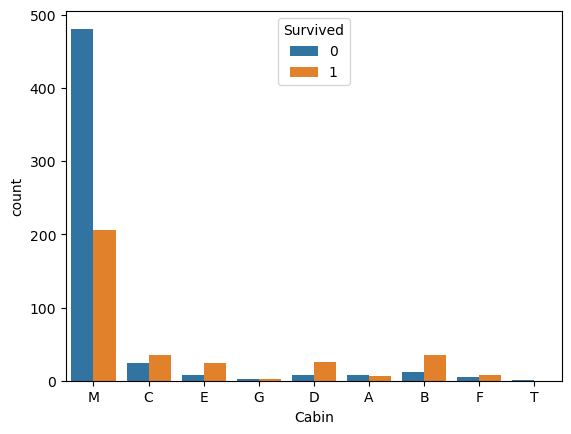

In [125]:
sns.countplot(data = train,
             x='Cabin',
             hue='Survived')

- M에서 상대적으로 많은 사망자가 분포해 있따. 모델에게 학습을 시켜봐도 의미가 있을 것 같다


###### Pclass 시각화

<AxesSubplot:xlabel='count', ylabel='Pclass'>

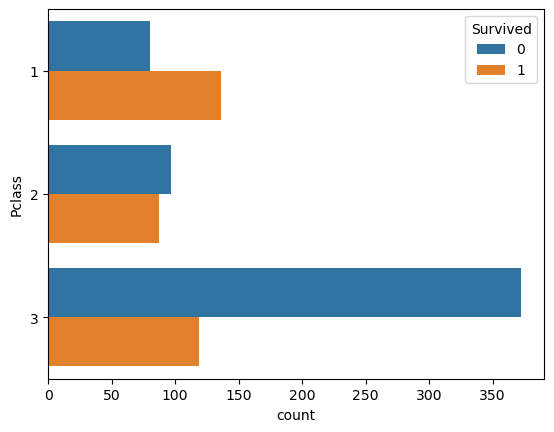

In [126]:
sns.countplot(data = train,
             y='Pclass',
             hue='Survived')

- 1등급에 탑승하면 생존 확률이 조금더 높다
- 3등급에 탑승하면 사망 확률이 더 높다.
- Pclass를 모델 학습에 사용해도 괜찮을 것 같다.

##### Pclass와 Cabin 시각화

<AxesSubplot:xlabel='Cabin', ylabel='count'>

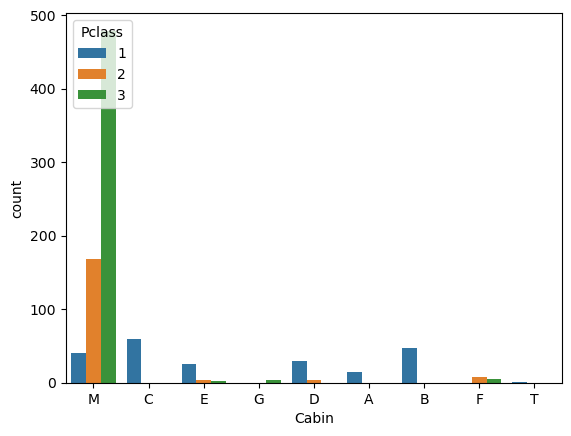

In [127]:
sns.countplot(data = train,
             x='Cabin',
              
             hue='Pclass')

- A, B, C는 1등급 탑승객들이 있다.
- M은 3등급 탑승객이 많다 -> 3등급 탑승객들이 많이 사망해서 정보가 손실된걸까?

##### Embarked, Sex 시각화

<AxesSubplot:xlabel='Embarked', ylabel='count'>

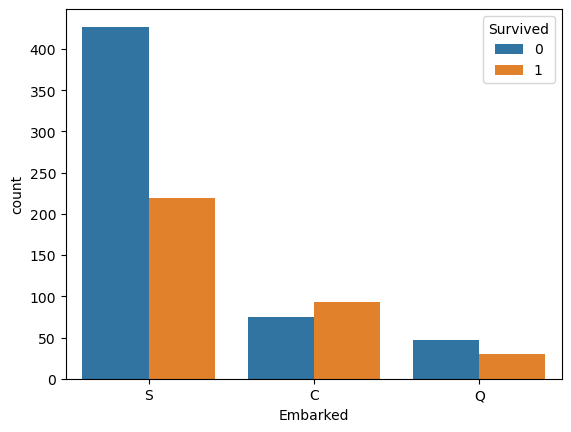

In [128]:
sns.countplot(data = train,
             x='Embarked',
              
             hue='Survived')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

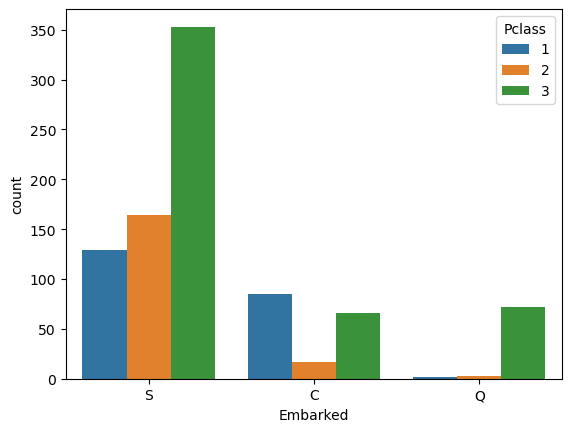

In [41]:
sns.countplot(data = train,
             x='Embarked',
             hue='Pclass')

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

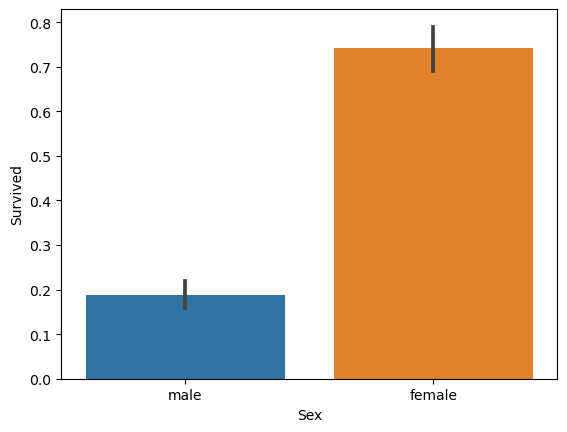

In [129]:
sns.barplot(data = train,
             x='Sex',
              
             y='Survived')

<AxesSubplot:xlabel='Sex', ylabel='count'>

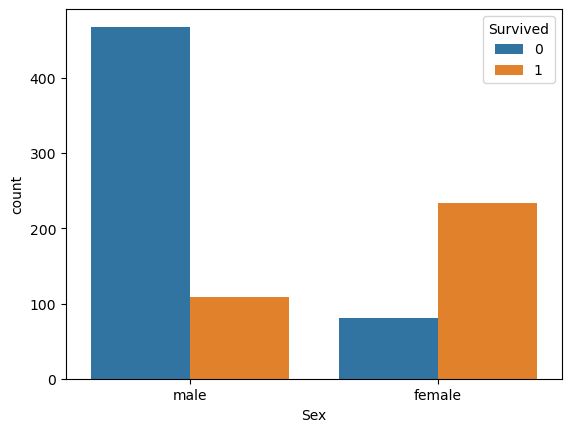

In [42]:
sns.countplot(data = train,
             x='Sex',
              
             hue='Survived')

#### 수치형 데이터
- 구간을 나눠서 종합하는 히스토그램
- 커널밀도추정 그래프

In [43]:
import matplotlib.pyplot as plt

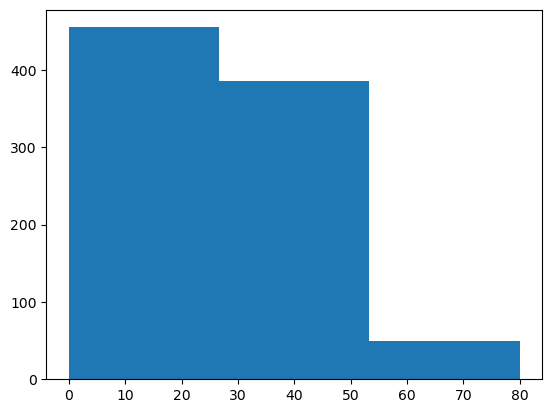

In [44]:
plt.hist(train['Age'], bins=3)
plt.show()

#### Age 시각화

<AxesSubplot:xlabel='Sex', ylabel='Age'>

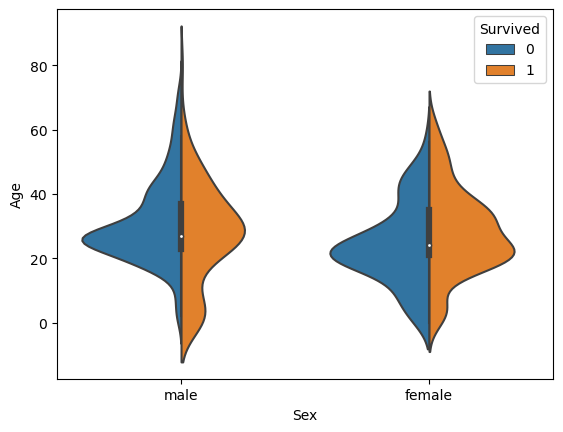

In [45]:
sns.violinplot( data=train,
              y='Age',x='Sex',hue='Survived',
              split=True)

- 남성은 20대가 조금 더 많이 사망
- 어린아이 중에서는 남자아이가 여자아이보다 상대적으로 생존 확률이 높다. (시대적 배경)

#### Fare 시각화

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

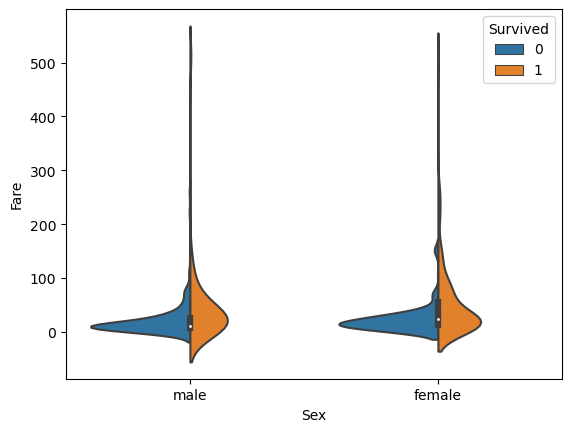

In [46]:
sns.violinplot( data=train,
              y='Fare',x='Sex',hue='Survived',
              split=True)

- 낮은 요금을 지불한 탑승객들이 많이 사망했다.
- 전체 요금이 0~40 달러 사이에 많이 분포되어 있다.

#### 특성공학
- SibSp, Parch를 합쳐서 가족이라는 새로운 컬럼 생성

In [47]:
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,M,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C


In [48]:
# 가족의 수
train['Family_Size']=train['SibSp']+train['Parch']+1

In [49]:
train.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,M,S,2


In [50]:
test['Family_Size']=test['SibSp']+test['Parch']+1

In [51]:
test.head(1)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,M,Q,1


<AxesSubplot:xlabel='Family_Size', ylabel='count'>

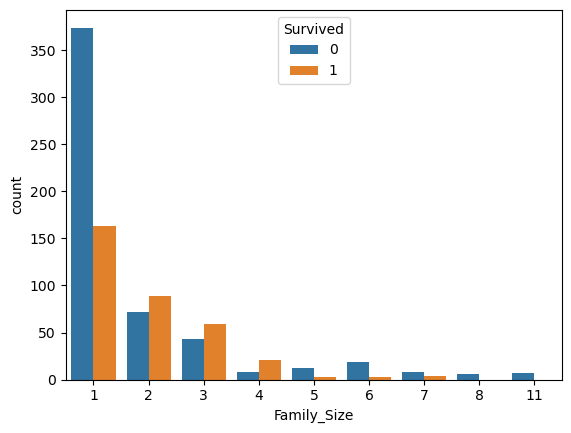

In [52]:
sns.countplot(data = train,
             x='Family_Size',
              
             hue='Survived')

- 1명일 경우 사망자가 훨씬 많다
- 2~4명일 경우 생존자가 조금 더 많다,.
- 5명 이상일 경우 사망자가 더 많다.
- Family_Size라는 수치 데이터를 그대로 사용할 수도 있지만, 범주형 데이터로 변환시켜보자!
- Binning(수치형-> 범주형) : 사소한 관찰 오류를 줄일 수 있음 (모델의 단순화 유도)

#### 특성공학
- Family_Size 가 1이면 Alone,2~4이면 Small, 5명 이상이면 Large 범주로 변경.
- cut 함수 활용

In [53]:
bins = [0,1,4,20]  # 구간
labels = ['Alone','Small','Large'] # 구간 별 범주 이름
train['FamilyGroup']=pd.cut(x=train['Family_Size'],
      bins=bins,
      labels=labels)

In [54]:
train.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,FamilyGroup
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,M,S,2,Small


In [55]:
train['FamilyGroup']

PassengerId
1      Small
2      Small
3      Alone
4      Small
5      Alone
       ...  
887    Alone
888    Alone
889    Small
890    Alone
891    Alone
Name: FamilyGroup, Length: 891, dtype: category
Categories (3, object): ['Alone' < 'Small' < 'Large']

In [56]:
test['FamilyGroup']=pd.cut(x=test['Family_Size'],
      bins=bins,
      labels=labels)

In [57]:
test.head(1)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,FamilyGroup
PassengerId,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,M,Q,1,Alone


In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    int64   
 1   Pclass       891 non-null    int64   
 2   Name         891 non-null    object  
 3   Sex          891 non-null    object  
 4   Age          891 non-null    int64   
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Cabin        891 non-null    object  
 10  Embarked     891 non-null    object  
 11  Family_Size  891 non-null    int64   
 12  FamilyGroup  891 non-null    category
dtypes: category(1), float64(1), int64(6), object(5)
memory usage: 91.5+ KB


In [59]:
train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,FamilyGroup
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,M,S,2,Small
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C,2,Small
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,M,S,1,Alone
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C,S,2,Small
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,M,S,1,Alone


#### 특성공학
- text 데이터 다루기 ( 비정형 데이터)
- Name 컬럽 : 중간의 호칭만 추출하여 정형화 시키자!

In [60]:
train['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [61]:
'Braund, Mr. Owen Harris'.split(',')[1].split('.')[0].strip()

'Mr'

In [62]:
def split_title(row):
    return row.split(',')[1].split('.')[0].strip()

In [63]:
train['Title']=train['Name'].apply(split_title)

In [64]:
train.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,FamilyGroup,Title
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,M,S,2,Small,Mr


In [65]:
test['Title']=test['Name'].apply(split_title)

In [66]:
test.head(1)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,FamilyGroup,Title
PassengerId,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,M,Q,1,Alone,Mr


In [67]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

<AxesSubplot:xlabel='Title', ylabel='count'>

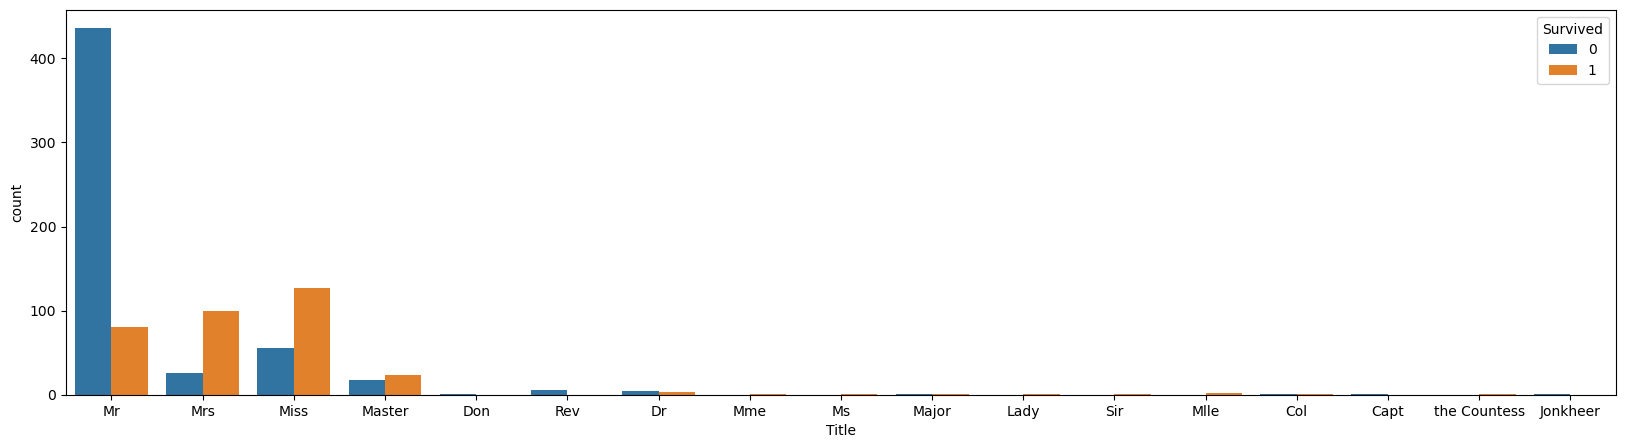

In [68]:
plt.figure(figsize=(20,5))
sns.countplot(data=train,
             x='Title',
             hue='Survived')


(0.0, 20.0)

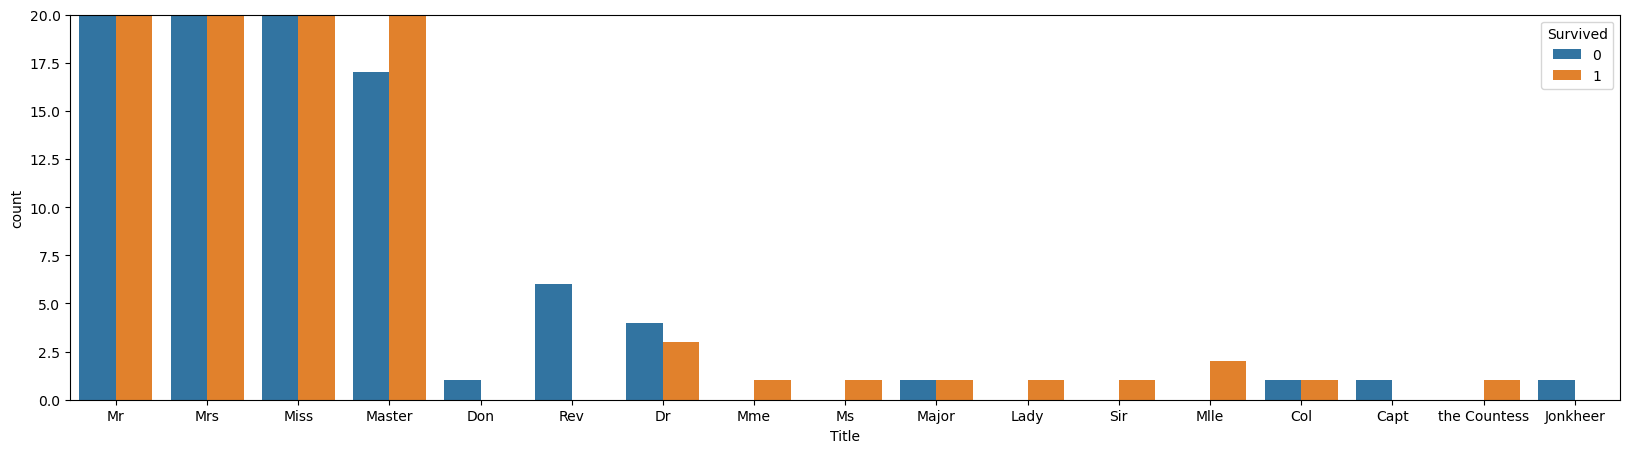

In [69]:
plt.figure(figsize=(20,5))
sns.countplot(data=train,
             x='Title',
             hue='Survived')
plt.ylim(0,20)

- Mr, Mrs, Miss : 성별과 관련이 있는 호칭, 머신러닝 모델 학습에 이용해봐도 괜찮을 것 같다.
- 나머지 호칭들은 인원수가 적고 종류가 많아서 범주를 통합시켜봐도 괜찮을 것 같다.


In [70]:
title_dic={'Mr':'Mr',
          'Mrs':'Mrs',
           'Miss':'Miss',
          'Master':'Master',
          'Mme':'Miss',
          'Lady':'Miss',
           'Don':'Other',
           'Rev':'Other',
           'Dr':'Other',
           'Ms':'Miss',
           'Major':'Other',
           'Sir':'Other',
           'Mlle':'Other',
           'Col':'Other',
           'Capt':'Other',
           'the Countess':'Other',
           'Jonkheer':'Other',
           'Dona':'Other'
          }

In [71]:
train['Title2']=train['Title'].map(title_dic)

In [72]:
train.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,FamilyGroup,Title,Title2
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,M,S,2,Small,Mr,Mr


In [73]:
train['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [74]:
test['Title2']=test['Title'].map(title_dic)

In [75]:
test['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [76]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [77]:
test['Title2']

PassengerId
892         Mr
893        Mrs
894         Mr
895         Mr
896        Mrs
         ...  
1305        Mr
1306     Other
1307        Mr
1308        Mr
1309    Master
Name: Title2, Length: 418, dtype: object

#### 티켓 정보는 사용하지 않겠다.
#### 사용하지 않을 컬럼 정리

In [78]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Family_Size', 'FamilyGroup', 'Title',
       'Title2'],
      dtype='object')

In [79]:
train.drop(['Name','Ticket','Title'],axis=1, inplace=True)
test.drop(['Name','Ticket','Title'],axis=1, inplace=True)

### 모델링
- 인코딩(문자형태의 데이터를 숫자형태의 데이터로 변환)
    1. label encoding
    2. one-hot encoding
        - 범주형 변수를 표현하는데 가장 널리 쓰이는 방법
        - 분류하고자 하는 범주(종류)만큼의 자릿수(컬럼)를 만들로 1과0만을
            이용하여 표현하는 방식
- 모델 선택 및 하이퍼파라미터 조정
- 모델 학습
- 모델 평가


In [83]:
categorical_features=['Sex', 'Cabin', 'Embarked', 'FamilyGroup','Title2']

In [84]:
# 원-핫 인코딩
pd.get_dummies(train['Title2'],prefix='Title2')

,Title2_Master,Title2_Miss,Title2_Mr,Title2_Mrs,Title2_Other
PassengerId,,,,,
1,0,0,1,0,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,0,1,0
5,0,0,1,0,0
...,...,...,...,...,...
887,0,0,0,0,1
888,0,1,0,0,0
889,0,1,0,0,0


In [85]:
for feature_name in categorical_features:
    one_hot=pd.get_dummies(train[feature_name],prefix=feature_name) # 원핫 인코딩
    train.drop(feature_name, axis=1, inplace=True) # 기존 글자형태 컬럼 삭제
    train = pd.concat([train,one_hot],axis=1)      # 기존 데이터에 원-학 데이터 붙이기


In [ ]:
train.head()

In [86]:
for feature_name in categorical_features:
    one_hot=pd.get_dummies(test[feature_name],prefix=feature_name) # 원핫 인코딩
    test.drop(feature_name, axis=1, inplace=True) # 기존 글자형태 컬럼 삭제
    test = pd.concat([test,one_hot],axis=1)      # 기존 데이터에 원-학 데이터 붙이기


In [ ]:
test.head()

In [ ]:
# train, test의 차집합 연산!
set(train.columns)-set(test.columns)

In [ ]:
set(test.columns)

In [ ]:
test['Cabin_T']=0

##### 문제와 정답으로 나누기

In [ ]:
X_train = train.drop('Survived',axis=1)
y_train=train['Survived']

In [ ]:
X_test =test
# y_test - kaggle에 있다

In [ ]:
X_train.columns

In [ ]:
X_test.columns

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
# train, test 컬럼 순서 맞추기!
X_test=X_test[X_train.columns]

In [ ]:
X_test.columns

In [ ]:
X_train.to_csv('X_train.csv',index=False)
y_train.to_csv('y_train.csv',index=False)


In [ ]:
X_test.to_csv('X_test.csv',index=False)

### 모델선택

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
knn_model = KNeighborsClassifier() # 거리
tree_model = DecisionTreeClassifier() # 질문

##### train. validation 분리

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train,y_val=train_test_split(X_train,y_train)

In [ ]:
X_train.shape,y_train.shape

In [ ]:
X_val.shape,y_val.shape

##### 학습 및 평가

In [ ]:
knn_model.fit(X_train,y_train)  # 학습

In [ ]:
tree_model.fit(X_train,y_train) # 학습

In [ ]:
print(knn_model.score(X_val,y_val)) # score 정확도
print(tree_model.score(X_val,y_val))

#### 교차검증

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
knn_result=cross_val_score(knn_model,X_train,y_train,cv=5)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
knn_result.mean()

In [ ]:
# cross_val_score( 모델, 문제 데이터, 정답데이터, 몇 겹(k))
tree_result=cross_val_score(tree_model,X_train,y_train,cv=5)
print(tree_result)

In [ ]:
tree_result.mean()

In [ ]:
X_train.shape,y_train.shape

#### KNN모델에 Scaler적용

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(X_train)

In [ ]:
transform_X_train=scaler.transform(X_train) # 데이터를 스케일러에 맞춰 변환

In [ ]:
transform_X_test=scaler.transform(X_test) # 변환

In [82]:
result=cross_val_score(knn_model,transform_X_train,y_train)
print(result)
result.mean()

NameError: name 'cross_val_score' is not defined

##### 하이퍼파라미터 튜닝

In [ ]:
score_list=[]
for k in range(1,150,2): # 이웃이 작으면 복잡, 많으면 단순
    knn_model=KNeighborsClassifier(n_neighbors=k) # 이웃에 따른 모델 생성
    knn_result=cross_val_score(knn_model,transform_X_train,y_train,cv=5) # 교차검증 성능
    score_list.append(knn_result.mean()) # 평균치 리스트에 담기

In [ ]:
plt.figure(figsize=(45,5))
plt.plot(range(1,150,2), score_list)
plt.xticks(range(1,150,2))
plt.grid()
plt.show()

In [ ]:
score_list

#### 평가 결과 제출

In [ ]:
pre = knn_model.predict(X_test)
pre

In [ ]:
# kaggle 에 y_test 가 있어 업로드해야함
result = pd.read_csv('data/gender_submission.csv')
result['Survived']=pre
result.to_csv('kjy_submission_01.csv',index=False)